<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#搭建神经网络八股" data-toc-modified-id="搭建神经网络八股-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>搭建神经网络八股</a></span><ul class="toc-item"><li><span><a href="#六步法搭建结构" data-toc-modified-id="六步法搭建结构-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>六步法搭建结构</a></span></li><li><span><a href="#Iris数据集用sequential和类方法搭建全连接神经网络" data-toc-modified-id="Iris数据集用sequential和类方法搭建全连接神经网络-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Iris数据集用sequential和类方法搭建全连接神经网络</a></span></li><li><span><a href="#Mnist数据集用sequential和类方法搭建神经网络" data-toc-modified-id="Mnist数据集用sequential和类方法搭建神经网络-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mnist数据集用sequential和类方法搭建神经网络</a></span></li><li><span><a href="#Fashion-数据集两种方法搭建神经网络" data-toc-modified-id="Fashion-数据集两种方法搭建神经网络-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Fashion 数据集两种方法搭建神经网络</a></span></li></ul></li><li><span><a href="#神经网络八股功能拓展" data-toc-modified-id="神经网络八股功能拓展-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>神经网络八股功能拓展</a></span><ul class="toc-item"><li><span><a href="#自制数据集，将原始图片信息制作成数据集" data-toc-modified-id="自制数据集，将原始图片信息制作成数据集-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>自制数据集，将原始图片信息制作成数据集</a></span></li><li><span><a href="#数据增强，图像数据可以经过对图像的简单变形来应对图像变形" data-toc-modified-id="数据增强，图像数据可以经过对图像的简单变形来应对图像变形-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>数据增强，图像数据可以经过对图像的简单变形来应对图像变形</a></span></li><li><span><a href="#断点续训，读取和保存模型参数" data-toc-modified-id="断点续训，读取和保存模型参数-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>断点续训，读取和保存模型参数</a></span></li><li><span><a href="#提取参数，打印参数" data-toc-modified-id="提取参数，打印参数-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>提取参数，打印参数</a></span></li><li><span><a href="#可视化" data-toc-modified-id="可视化-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>可视化</a></span></li></ul></li></ul></div>

# 搭建神经网络八股

    步骤
    iris数据代码复现
    mnist数据训练
    fashion数据训练


## 六步法搭建结构

In [ ]:
# 用tensorflow API:tf.keras搭建神经网络八股
# 步骤：六步法：
# import 
# train,test
# model=tf.keras.models.Sequential  搭建结构
# model.compile  配置训练方法
# model.fit  执行训练过程
# model.summary  打印出网络结构和参数统计


model = tf.keras.models.Sequential([网络结构])
网络结构举例：
拉直层：tf.keras.layers.Flatten() 把输入特征拉直成一位数组，不涉及计算
全连接层：tf.keras.layers.Dense(神经元个数，activition='激活函数',
                          kernel_regularizer=哪种正则化)
    激活函数可以选择：relu,softmax,sigmod,tanh
    正则化可选：tf.keras.regularizers.l1(),tf.keras.regularizers.l2()
卷积层：tf.keras.layers.Conv2D(filters=卷积核个数，kernal_size=卷积核尺寸,
                          strides=卷积步长，padding='valid'or 'same')
LSTM层：tf.keras.layers.LSTM()


model.compile(optimizer=优化器,
             loss=损失函数,
             metrics=['准确率'])   #配置训练方法
optimizer可选：
    'sgd' 或者tf.keras.optimizers.SGD(lr=学习率，momentum=动量参数)
    'adagrad'或者 tf.keras.optimizers.Adagrad(lr=学习率)
    'adadelta'或者 tf.keras.optimizers.Adadelta(lr=学习率)
    'adam'或者 tf.keras.optimizers.Adam(lr=学习率,beta_1=0.9,beta_2=0.999)
loss可选：
    'mse'或者 tf.keras.losses.MeanSquaredError()
    'sparse_categorical_crossentrop'稀疏分类交叉熵，或者tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False,这个参数是在询问是否是原始输出，也就是没有经过概率分布的输出)  
metrics可选：
    'accuracy':y_和y是数值型
    'categorical_accuracy':y_和y都是独热编码类型（概率分布）,y_=[0,1,0],y=[0.26,0.5,0.24]
    'sparse_categorical_accuracy':y_是数值型，y是独热编码（概率分布），y_=[1],y=[0.25,0.5,0.24]


model.fit(训练集输入特征，训练集标签，
         batch_size = ,epochs= ,
         validation_data=(测试集的输入特征，测试集标签),
         validation_split=训练集占测试集比例,
         validation_frep=多少次epoch测试一次)

model.summary()


## Iris数据集用sequential和类方法搭建全连接神经网络

In [127]:
# Iris数据集sequential代码实现
import tensorflow as tf
from  sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(129)
np.random.shuffle(x_train)
np.random.seed(129)
np.random.shuffle(y_train)
tf.random.set_seed(129)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2())
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=500,validation_split=0.2,validation_freq=20)
model.summary()




Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 2.3442 - sparse_categorical_accuracy: 0.2917
Epoch 2/500
4/4 [==============================] - 0s 500us/step - loss: 1.3050 - sparse_categorical_accuracy: 0.2500
Epoch 3/500
4/4 [==============================] - 0s 1000us/step - loss: 0.9678 - sparse_categorical_accuracy: 0.3833
Epoch 4/500
4/4 [==============================] - 0s 498us/step - loss: 0.8295 - sparse_categorical_accuracy: 0.7167
Epoch 5/500
4/4 [==============================] - 0s 500us/step - loss: 0.7752 - sparse_categorical_accuracy: 0.6167
Epoch 6/500
4/4 [==============================] - 0s 500us/step - loss: 0.9608 - sparse_categorical_accuracy: 0.6750
Epoch 7/500
4/4 [==============================] - 0s 500us/step - loss: 0.6480 - sparse_categorical_accuracy: 0.6833
Epoch 8/500
4/4 [==============================] - 0s 500us/step - loss: 0.7257 - sparse_categorical_accuracy: 0.6750
Epoch 9/500
4/4 [==============================] - 0s 501

4/4 [==============================] - 0s 500us/step - loss: 0.4166 - sparse_categorical_accuracy: 0.8583
Epoch 136/500
4/4 [==============================] - 0s 500us/step - loss: 0.3483 - sparse_categorical_accuracy: 0.9417
Epoch 137/500
4/4 [==============================] - 0s 250us/step - loss: 0.3638 - sparse_categorical_accuracy: 0.9333
Epoch 138/500
4/4 [==============================] - 0s 251us/step - loss: 0.3894 - sparse_categorical_accuracy: 0.9083
Epoch 139/500
4/4 [==============================] - 0s 251us/step - loss: 0.3595 - sparse_categorical_accuracy: 0.9500
Epoch 140/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3802 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.3870 - val_sparse_categorical_accuracy: 1.0000
Epoch 141/500
4/4 [==============================] - 0s 500us/step - loss: 0.3695 - sparse_categorical_accuracy: 0.9167
Epoch 142/500
4/4 [==============================] - 0s 500us/step - loss: 0.4126 - sparse_categorical_accuracy: 0.

4/4 [==============================] - 0s 250us/step - loss: 0.3423 - sparse_categorical_accuracy: 0.9667
Epoch 268/500
4/4 [==============================] - 0s 500us/step - loss: 0.3441 - sparse_categorical_accuracy: 0.9667
Epoch 269/500
4/4 [==============================] - 0s 500us/step - loss: 0.3498 - sparse_categorical_accuracy: 0.9250
Epoch 270/500
4/4 [==============================] - 0s 500us/step - loss: 0.3522 - sparse_categorical_accuracy: 0.9250
Epoch 271/500
4/4 [==============================] - 0s 498us/step - loss: 0.3367 - sparse_categorical_accuracy: 0.9500
Epoch 272/500
4/4 [==============================] - 0s 498us/step - loss: 0.3723 - sparse_categorical_accuracy: 0.9250
Epoch 273/500
4/4 [==============================] - 0s 500us/step - loss: 0.3879 - sparse_categorical_accuracy: 0.8833
Epoch 274/500
4/4 [==============================] - 0s 502us/step - loss: 0.3529 - sparse_categorical_accuracy: 0.9417
Epoch 275/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 500us/step - loss: 0.3531 - sparse_categorical_accuracy: 0.9333
Epoch 400/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3324 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.3664 - val_sparse_categorical_accuracy: 1.0000
Epoch 401/500
4/4 [==============================] - 0s 750us/step - loss: 0.3318 - sparse_categorical_accuracy: 0.9750
Epoch 402/500
4/4 [==============================] - 0s 500us/step - loss: 0.3504 - sparse_categorical_accuracy: 0.9500
Epoch 403/500
4/4 [==============================] - 0s 500us/step - loss: 0.3353 - sparse_categorical_accuracy: 0.9500
Epoch 404/500
4/4 [==============================] - 0s 499us/step - loss: 0.3334 - sparse_categorical_accuracy: 0.9667
Epoch 405/500
4/4 [==============================] - 0s 500us/step - loss: 0.3300 - sparse_categorical_accuracy: 0.9750
Epoch 406/500
4/4 [==============================] - 0s 501us/step - loss: 0.3324 - sparse_categorical_accuracy: 0.

In [131]:
#irts 定义类实现class
import tensorflow as tf
from  sklearn import datasets
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(129)
np.random.shuffle(x_train)
np.random.seed(129)
np.random.shuffle(y_train)
tf.random.set_seed(129)

# 就18-25行和上面不一样
class IrisModel(Model):
    def __init__(self):
        super(IrisModel,self).__init__()
        self.d1 = Dense(3)
    def call(self,x):
        y = self.d1(x)
        return y
model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=500,validation_split=0.2,validation_freq=20)
model.summary()


Epoch 1/500
4/4 [==============================] - 0s 751us/step - loss: 5.7534 - sparse_categorical_accuracy: 0.3000
Epoch 2/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 3/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 4/500
4/4 [==============================] - 0s 742us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 5/500
4/4 [==============================] - 0s 499us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 6/500
4/4 [==============================] - 0s 752us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 7/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 8/500
4/4 [==============================] - 0s 502us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 9/500
4/4 [==============================] - 0s 50

4/4 [==============================] - 0s 499us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 136/500
4/4 [==============================] - 0s 499us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 137/500
4/4 [==============================] - 0s 499us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 138/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 139/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 140/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333 - val_loss: 7.1404 - val_sparse_categorical_accuracy: 0.2333
Epoch 141/500
4/4 [==============================] - 0s 501us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 142/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.

4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 268/500
4/4 [==============================] - 0s 753us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 269/500
4/4 [==============================] - 0s 252us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 270/500
4/4 [==============================] - 0s 499us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 271/500
4/4 [==============================] - 0s 250us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 272/500
4/4 [==============================] - 0s 250us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 273/500
4/4 [==============================] - 0s 499us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 274/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 275/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 400/500
4/4 [==============================] - 0s 3ms/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333 - val_loss: 7.1404 - val_sparse_categorical_accuracy: 0.2333
Epoch 401/500
4/4 [==============================] - 0s 498us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 402/500
4/4 [==============================] - 0s 750us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 403/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 404/500
4/4 [==============================] - 0s 500us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 405/500
4/4 [==============================] - 0s 498us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.3333
Epoch 406/500
4/4 [==============================] - 0s 750us/step - loss: 5.7972 - sparse_categorical_accuracy: 0.

## Mnist数据集用sequential和类方法搭建神经网络

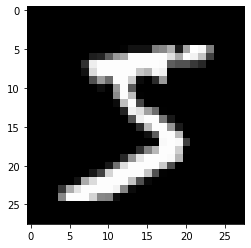

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [136]:
# Mnist数据集用sequential进行训练：导入包的位置和定义类的位置有所不同
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#可视化
plt.imshow(x_train[0],cmap='gray')  #绘制灰度图
plt.show()
# print('x_train[0]:\n',x_train[0])
# print('y_train[0]:\n',y_train[0])
# print('x_train.shape:\n',x_train.shape)
# print('y_train.shape:\n',y_train.shape)

#用自定义类class训练模型
x_train,x_test=x_train/255,x_test/255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs = 5,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

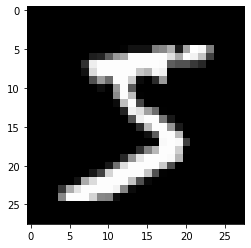

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [139]:
# Mnist数据集用自定义类进行训练：导入包的位置和定义类的位置有所不同
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#可视化
plt.imshow(x_train[0],cmap='gray')  #绘制灰度图
plt.show()
# print('x_train[0]:\n',x_train[0])
# print('y_train[0]:\n',y_train[0])
# print('x_train.shape:\n',x_train.shape)
# print('y_train.shape:\n',y_train.shape)

#用自定义类class训练模型
x_train,x_test=x_train/255,x_test/255

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128,activation = 'relu'),
#     tf.keras.layers.Dense(10,activation = 'softmax')
# ])
class MnistModel(Model):
    def __init__(self):
        super(MnistModel,self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128,activation='relu')
        self.d2 = Dense(10,activation='softmax')
    def call(self,x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y
model = MnistModel()

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs = 5,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

## Fashion 数据集两种方法搭建神经网络

In [149]:
# Fashion 数据集6万张衣裤图片和标签训练，1万张图片和标签测试
# 用sequential方法实现分类
fashion = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion.load_data()
x_train,x_test=x_train/255,x_test/255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

Epoch 1/20
1875/1875 [==============================] - 2s 804us/step - loss: 0.4995 - sparse_categorical_accuracy: 0.8233 - val_loss: 0.4309 - val_sparse_categorical_accuracy: 0.8440
Epoch 2/20
1875/1875 [==============================] - 1s 788us/step - loss: 0.3771 - sparse_categorical_accuracy: 0.8638 - val_loss: 0.3976 - val_sparse_categorical_accuracy: 0.8577
Epoch 3/20
1875/1875 [==============================] - 1s 751us/step - loss: 0.3401 - sparse_categorical_accuracy: 0.8749 - val_loss: 0.3840 - val_sparse_categorical_accuracy: 0.8616
Epoch 4/20
1875/1875 [==============================] - 1s 761us/step - loss: 0.3135 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.3755 - val_sparse_categorical_accuracy: 0.8668
Epoch 5/20
1875/1875 [==============================] - 1s 769us/step - loss: 0.2968 - sparse_categorical_accuracy: 0.8905 - val_loss: 0.3509 - val_sparse_categorical_accuracy: 0.8735
Epoch 6/20
1875/1875 [==============================] - 1s 754us/step - loss: 0.

In [147]:
# Fashion数据集用自定义类方法实现分类
fashion = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion.load_data()
x_train,x_test=x_train/255,x_test/255


class FashionModel(Model):
    def __init__(self):
        super(Model,self).__init__(self)
        self.flatten = Faltten()
        self.d1=self.Dense(128,activation='relu')
        self.d2=self.Dense(10,activation='softmax')
    def call(self,x):
        x=self.faltten(x)
        y=self.d1(x)
        y=self.d2(y)
        return y
    
model = FashionModel()
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 1s 747us/step - loss: 0.2809 - sparse_categorical_accuracy: 0.8945 - val_loss: 0.3431 - val_sparse_categorical_accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 1s 682us/step - loss: 0.2669 - sparse_categorical_accuracy: 0.9009 - val_loss: 0.3473 - val_sparse_categorical_accuracy: 0.8795
Epoch 3/5
1875/1875 [==============================] - 1s 682us/step - loss: 0.2564 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.3260 - val_sparse_categorical_accuracy: 0.8864
Epoch 4/5
1875/1875 [==============================] - 1s 723us/step - loss: 0.2463 - sparse_categorical_accuracy: 0.9088 - val_loss: 0.3532 - val_sparse_categorical_accuracy: 0.8796
Epoch 5/5
1875/1875 [==============================] - 1s 683us/step - loss: 0.2376 - sparse_categorical_accuracy: 0.9112 - val_loss: 0.3333 - val_sparse_categorical_accuracy: 0.8833
Model: "sequential_10"
______________________________________________________________

# 神经网络八股功能拓展

    1、自制数据集，解决本领域应用
    2、数据增强，扩充数据集
    3、断点续训，存取模型参数
    4、参数提取，把参数存入文本
    5、acc/loss可视化，查看训练效果
    6、应用程序，给图识别物体


## 自制数据集，将原始图片信息制作成数据集

In [214]:
# 1、在Mnist数据集基础上进行演练
# 自制数据集，代替load_data函数，从而实现本领域数集的创建
# def generated(图片路径，标签文件)返回输入特征和标签
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
import os
def generated(path,txt):
    f = open(txt,'r')
    contents = f.readlines()
    f.close()
    x,y_=[],[]
    for content in contents:
        values = content.split()
        img_path = path+values[0]
        img = Image.open(img_path)
        img = np.array(img.convert('L'))
        img = img/255
        x.append(img)
        y_.append(values[1])
        print('loading:'+content)
    
    x = np.array(x)
    y_ = np.array(y_)
    y_ = y_.astype(np.int64)
    return x,y_

In [171]:
# python默认内置数据类型：
# 字符型：str
# 数值型：int,float,complex
# 序列类型：list,tuple,range(start,end,step)
# 映射类型：dict
# 集合类型：set,frozenset
# 布尔类型：bool
# 二进制类型：bytes,bytearray,memoryview


In [1]:
train_path = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_train_jpg_60000/'
train_txt = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_train_jpg_60000.txt'
# 训练集输入特征存储文件
x_train_savepath = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_x_train.npy'
# 训练集标签存储文件
y_train_savepath = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_y_train.npy'

x_train,y_train = generated(train_path,train_txt)

In [2]:
test_path = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_test_jpg_10000/'
test_txt = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_test_jpg_10000.txt'
x_test_savepath = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_x_test.npy'
y_test_savepath = 'D:/tensorflow笔记/class4/MNIST_FC/mnist_image_label/mnist_y_test.npy'

x_test,y_test = generated(test_path,test_txt)

In [ ]:
# # 检查训练集和测试集是否已经存在，因为之前已经跑过，这儿就不跑了
# if os.path.exist(x_train_savepath) and os.path.exist(y_train_savepath) and  os.path.exist(x_test_savepath) and os.path.exist(y_test_savepath):
#     print('------------------load datasets----------------')
#     x_train_save = np.load(x_train_savepath)
#     y_train = np.load(y_train_savepath)
#     x_test_save = np.load(x_test_savepath)
#     y_test = np.load(y_test_savepath)
#     x_train = np.reshape(x_train_save,len(x_train_save),28,28)
#     x_test = np.reshape(x_test_save,len(x_test_save),28,28)
# else:
#     print('-----------------generated dataset--------------')
#     x_train,y_train = generated(train_path,train_txt)
#     x_test,y_test = generated(test_path,test_txt)
#     print('----------------save datasets--------------------')
#     x_train_save = np.reshape(x_train,(len(x_train),-1))
#     x_test_save = np.reshape(x_test,(len(x_test),-1))
#     np.save(x_train_savepath,x_train_save)
#     np.save(y_train_savepath,y_train_save)
#     np.save(x_test_savepath,x_test_save)
#     np.save(y_test_savepath,y_test_save)


In [222]:
print('----------------save datasets--------------------')
x_train_save = np.reshape(x_train,(len(x_train),-1))
x_test_save = np.reshape(x_test,(len(x_test),-1))
np.save(x_train_savepath,x_train_save)
np.save(y_train_savepath,y_train)
np.save(x_test_savepath,x_test_save)
np.save(y_test_savepath,y_test)


----------------save datasets--------------------


In [216]:
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

In [217]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['sparse_categorical_accuracy']
)
model.fit(x_train,y_train,batch_size=32,epochs = 5,validation_data=(x_test,y_test),validation_freq = 1)
model.summary()


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2628 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.1342 - val_sparse_categorical_accuracy: 0.9626
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1149 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.1027 - val_sparse_categorical_accuracy: 0.9698
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.0830 - val_sparse_categorical_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0902 - val_sparse_categorical_accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0747 - val_sparse_categorical_accuracy: 0.9771
Model: "sequential_16"
_________________________________________________________________
Layer 

## 数据增强，图像数据可以经过对图像的简单变形来应对图像变形

In [223]:
# 2、数据增强，自制数据集
# 数据增强可以扩展数据集，对图像的增i强就是对图像的简单形变，用来应对因拍照角度不同硬气的图形形变
# image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator( 
#     rescale = 所有数据将乘以该数值,
#     rotation_range = 随即旋转角度范围,
#     width_shift_range = 随机宽度偏移量,
#     height_shift_range = 随机高度偏移量,
#     水平翻转：horizontal_flip = 是否随机水平反转,
#     随机缩放：zoom_range = 随机缩放的范围[1-n,1+n]
# )
# image_gen_train.fit(x_train) 输入是四维的，所以需要先把x_train增加维度，单通道的

# 实际数据中应用：fashion
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

fashion = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion.load_data()
x_train,x_test=x_train/255,x_test/255

#————————-新增-------------------------#
x_train = x_train.reshape(x_train.shape[0],28,28,1)
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./1.,# 如果是图像，分母为255，可归至0-1
    rotation_range = 45,  #随机旋转45度
    width_shift_range = .15,   #随机宽度偏移量,
    height_shift_range = .15 ,   #随机高度偏移量,
    horizontal_flip = True,   #是否随机水平反转,
    zoom_range =0.5     #随机缩放的范围[1-n,1+n]
)
image_gen_train.fit(x_train) #输入是四维的，所以需要先把x_train增加维度，单通道的
#————————-新增-------------------------#

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

# --------------------改变model_gen_train.flow()---------------------#
model.fit(image_gen_train.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_test,y_test),validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 1.5140 - sparse_categorical_accuracy: 0.4547 - val_loss: 0.9860 - val_sparse_categorical_accuracy: 0.6289
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 1.2866 - sparse_categorical_accuracy: 0.5373 - val_loss: 0.9626 - val_sparse_categorical_accuracy: 0.6456
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 1.2122 - sparse_categorical_accuracy: 0.5632 - val_loss: 0.8978 - val_sparse_categorical_accuracy: 0.6772
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 1.1635 - sparse_categorical_accuracy: 0.5772 - val_loss: 0.9645 - val_sparse_categorical_accuracy: 0.6618
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 1.1341 - sparse_categorical_accuracy: 0.5889 - val_loss: 0.9016 - val_sparse_categorical_accuracy: 0.6515oss: 1.1332 - sparse_categorical_ac
Model: "sequential_17"
___________________________

## 断点续训，读取和保存模型参数

In [ ]:
# 3、断电续训：读取保存模型
#读取模型
# model.load_weight(路径文件名),  #读取模型
# 保存模型，回调函数
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath = 路径文件名,
#     save_weight_only = True/False,
#     save_best_only = True/False
# )
# history = model.fit(callbacks = [cp_callback])

# Mnist数据集用swquential进行训练：导入包的位置和定义类的位置有所不同
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras import Model
import os

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test=x_train/255,x_test/255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['sparse_categorical_accuracy'])
#--------------------不同的地方-----------------------#
checkpoint_save_path = 'D:/tensorflow笔记/class4/MNIST_FC/mnist.ckpt'  #ckpt文件会生成对应的index文件
if os.path.exists(checkpoint_save_path + '.index'):
    print('-----------load model----------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_save_path,
    save_weights_only = True,
    save_best_only= True)
history = model.fit(x_train,y_train,batch_size = 32,epochs = 5,
                    validation_data=(x_test,y_test),validation_freq=1,
                   callbacks = [cp_callback])

model.summary()

## 提取参数，打印参数

In [ ]:
# 4、提取参数，将参数写入文本中
# 提取参数：model.trainable_varibles   返回模型中可训练的参数
# 设置print格式打印结果：np.set_printoptions(threshold=超过多少位省略显示)
# 再断点续训基础上添加下文
np.set_printoptions(threshold=np.inf)  #表示无限大，要不然打印出来的结果有省略号
print(mpdel.trainalbe_variables)
file = open('./weights.txt','w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy())+'\n')
file.close()



## 可视化

In [ ]:
# 5、acc/loss可视化
history = model.fit(...)
训练集loss:loss = history.history['loss']   
测试集loss:val_loss = history.history['val_loss']    
训练集准确率:acc = history.history['sparse_categorical_accuracy']    
测试集准确率:val_acc = history.history['val_sparse_categorical_accuracy']    
plt.subplot(1,2,1)
plt.plot(acc,label='training acc')
plt.plot(val_acc,label='validation acc')
plt.title('acc')
plt.legend()

plt.subplot(1,2,1)
plt.plot(loss,label='training loss')
plt.plot(val_loss,label='validation loss')
plt.title('loss')
plt.legend()
plt.show()

##程序应用，给实际图片识别数字

In [ ]:
# 6、应用程序，给图识物,希望输入一张图片能识别数字
result = model.predict(输入特征，batch_size=整数)

# 复现模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
# 加载参数
model.load_weights(model_save_path)
# 预测结果
prenum = int(input('input the number of test picture:'))
for i in range(prenum):
    image_path = input('the path of the picture:')
    img = Image.open(image_path)
    img = img.resize((28,28),Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))
    
    img_arr = 255-img_arr  #白底黑字转为黑底白字
    img_arr = img_arr/255.0
    x_predict = img_arr[tf.newaxis,...]
    result = model.predict(x_predict)
    pred = tf.argmax(result,axis=1)
    print('\n')
    tf.print(pred)

